In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

In [2]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnb=MultinomialNB()
gnb=GaussianNB()

In [4]:
#X,y=load_digits(return_X_y=True)
data=load_digits()

In [5]:
X=data.data
y=data.target

In [6]:
X.shape,y.shape

((1797, 64), (1797,))

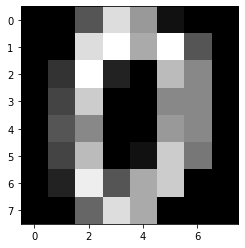

In [7]:
plt.imshow(X[0].reshape(8,8),cmap="gray")

In [8]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
## multinomial nb is used for discreate value and Gauian nb is used for continous value 
## so in this case mutinomial is used because we have data like discreate value and moreover
# bernolis nb is used for only for classfication like one or zero

In [10]:
mnb.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
gnb.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [12]:
mnb.score(X,y)

0.9053978853644964

In [13]:
gnb.score(X,y)

0.8580968280467446

In [14]:
cross_val_score(mnb,X,y,cv=10,scoring="accuracy").mean()

0.8797858472998138

In [15]:
cross_val_score(gnb,X,y,cv=10,scoring="accuracy").mean()

0.8113904407200497

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


<Figure size 432x288 with 0 Axes>

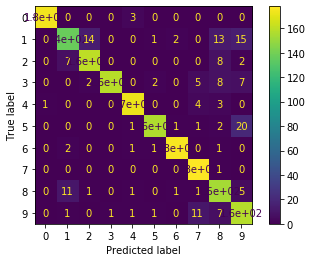

In [17]:
plt.figure()
plot_confusion_matrix(mnb,X,y)
con=confusion_matrix(y,mnb.predict(X))
print(con)
plt.show()

[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


<Figure size 432x288 with 0 Axes>

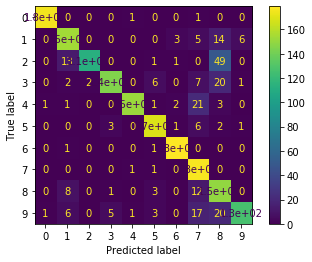

In [18]:
plt.figure()
plot_confusion_matrix(gnb,X,y)
con=confusion_matrix(y,gnb.predict(X))
print(con)
plt.show()

In [27]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [23]:
X,y=make_classification(n_features=2,n_informative=2,n_redundant=0,n_samples=200,random_state=42)

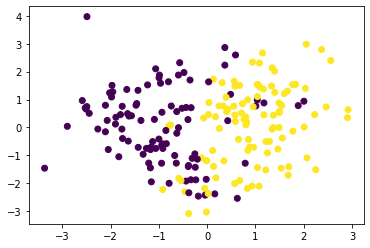

In [25]:
plt.scatter(X[:,0],X[:,1],c=y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [29]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
gnb.score(X_test,y_test)

0.8181818181818182

In [31]:
gnb.predict(X_test[:10])

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [32]:
y_test[:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [44]:
#acc=np.sum((gnb.predict(X_test)==y_test).mean())
acc=np.sum((gnb.predict(X_test)==y_test)/len(y_test))

In [45]:
acc

0.8181818181818182

In [47]:
y_=gnb.predict(X)

In [48]:
confusion_matrix(y,y_)

array([[86, 14],
       [14, 86]], dtype=int64)

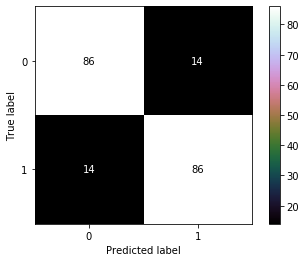

In [50]:
#plot_confusion_matrix(gnb,X,y,cmap="viridis")
plot_confusion_matrix(gnb,X,y,cmap=plt.cm.cubehelix)